# Justin MacInnes

## Research question/interests

What are the most popular types of anime are based on the popularity rating of the anime, and is there a correlation between popularity and number of people who have completed watching the anime?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
pd.read_csv("../data/raw/anime.csv")

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


### Side note: If we include all columns and rows, Jupyter lab will constantly crash as it does not have enough memory to load that many rows. 

In [3]:
df = pd.read_csv("../data/raw/anime.csv")

## Task 1: EDA

In [4]:
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [5]:
df.nunique(axis=0)

MAL_ID           17562
Name             17558
Score              533
Genres            5034
English name      6831
Japanese name    16679
Type                 7
Episodes           201
Aired            11947
Premiered          231
Producers         3783
Licensors          231
Studios           1090
Source              16
Duration           313
Rating               7
Ranked           10490
Popularity       11755
Members           9508
Favorites         1543
Watching          3580
Completed         7822
On-Hold           2915
Dropped           3035
Plan to Watch     7055
Score-10          3379
Score-9           3645
Score-8           4515
Score-7           4933
Score-6           4236
Score-5           3288
Score-4           2235
Score-3           1506
Score-2           1110
Score-1           1084
dtype: int64

In [6]:

def clean_Type(row):
    atype = ['Unknown']
    if row.Type in atype:
        return 'Other'
    return row.Type
def clean_df(playlist):
    df_cleaned=df.copy()
    df_cleaned['Type']=df_cleaned.apply(lambda row:clean_Type(row),axis=1)
    return df_cleaned
df_cleaned = clean_df(df)
print(df_cleaned.Type.unique())

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Other']


The above code takes the "Unknown" type and changes it to other. Although an animes type may not explicitly be what's listed, the shows type isn't just "unknown".

In [7]:
df_cleaned = df_cleaned[df_cleaned['Popularity']>0]
df_cleaned = df_cleaned[df_cleaned['Completed']>0]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
 

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000
mean,20877.399565,8701.477952,35590.264694,471.261875,2298.903999,22784.476778,984.289531,1212.523575,8310.070812
std,14697.590362,5063.493421,127092.774304,4125.576611,14258.605511,92332.177940,4338.544350,4809.234523,24059.837585
min,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
25%,5654.500000,4297.500000,342.000000,0.000000,14.000000,130.000000,7.000000,38.000000,112.000000
50%,21751.000000,8686.000000,2114.000000,3.000000,80.000000,925.000000,50.000000,81.000000,752.000000
75%,35104.500000,13091.000000,13845.000000,33.000000,549.000000,7026.000000,308.000000,286.000000,4162.000000
max,48491.000000,17565.000000,2589552.000000,183914.000000,887333.000000,2182587.000000,187919.000000,174710.000000,425531.000000


##### It makes more sense for an anime that has a popularity rating to have been completed by at least 1 person, so the minimum has been set to 1. 
##### It should be noted that the more popular a show is, the lower the popularity number will be, to a minimum value of 1 being the most popular.  

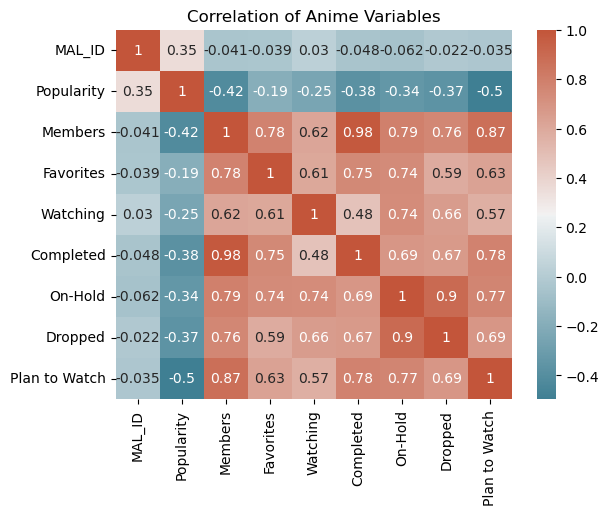

In [8]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title='Correlation of Anime Variables')
plt.savefig('../images/justineda1.PNG')

#### EDA Fig. 1
##### Interesting to note here that there's a negative correlation between popularity and completed. 
##### However, it's likely negative due to the fact that a lower popularity number means that it is more positive.

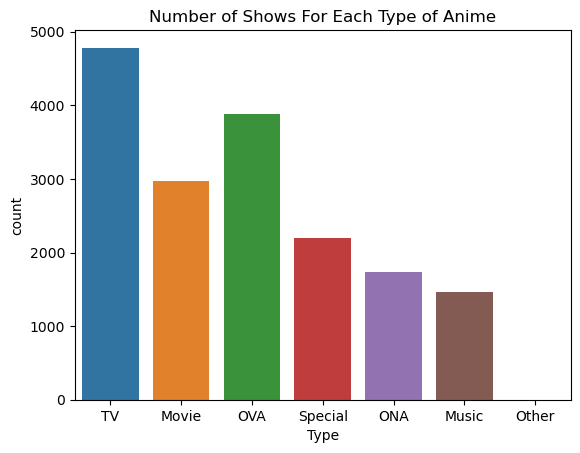

In [32]:
sns.countplot(data=df_cleaned,x='Type').set(title='Number of Shows For Each Type of Anime')
plt.savefig('../images/justineda2.PNG')

#### EDA Fig. 2
##### This countplot above shows the amount of anime produced for each category.

In [10]:
#sns.pairplot(df_cleaned,corner=True)
#plt.savefig('../images/justineda3.png')

#### EDA Fig. 3
##### Looking at the popularity to completed scatterplot, you can see that the more popular a show is, the more show completions there are. 

## Task 2: Analysis Pipeline
### Some parts of task 1 are involved in the analysis pipeline

In [11]:
df = pd.read_csv('../data/raw/anime.csv')

##### Above code loads data

In [12]:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4):
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdf_cleaned == df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

##### Above code takes columns and gets rid of any that have more than 40% null values. 

In [13]:
df_cleaned.drop(df_cleaned.columns[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34]],axis=1,inplace=True)  

##### Above code drops all columns not used - in this case, everything that isnt 'Popularity', 'Type' and 'Completed'.

In [14]:
df_cleaned.dtypes

Type          object
Popularity     int64
Completed      int64
dtype: object

##### Data types look good and ready to be operated on where needed for "Popularity" and "Completed". "Type" needs to be a string. 

In [15]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(17031, 3)

##### Of the columns and rows remaining that I need, this will remove any null values. 

In [16]:
dfn = df_cleaned.rename(columns={'Completed':'Full Anime Completions'})

##### Above code renames the completed column to 'Full Anime Completions' to clarify

In [17]:
dfn

,Type,Popularity,Full Anime Completions
0,TV,39,718161
1,Movie,518,208333
2,TV,201,343492
3,TV,1467,46165
4,TV,4369,7314
...,...,...,...
17543,TV,2597,5
17544,TV,5731,2
17549,OVA,4546,4
17552,Special,4830,7207


##### Above code shows Types, Popularity and # Completed for each anime collected. 

In [18]:
dfn.sort_values(by='Full Anime Completions',ascending=False)


,Type,Popularity,Full Anime Completions
7449,TV,2,2182587
1393,TV,1,2146116
6614,TV,4,1907261
10451,TV,5,1841220
11185,TV,6,1655900
...,...,...,...
16321,TV,10776,1
13230,ONA,4671,1
13251,Movie,4133,1
17391,TV,2688,1


##### Above code shows the most completed animes at the top

## Task 3: Method Chaining
### Making the code 'cleaner'

In [19]:
def load_and_process(path_to_csv_file):
    df_loader = (
        pd.read_csv('../data/raw/anime.csv')
        #loads data
    )
    def clean_Type(row):
        atype = ['Unknown']
        if row.Type in atype:
            return 'Other'
        return row.Type
    def clean_df(playlist):
        df_cleaned=df_loader.copy()
        df_cleaned['Type']=df_cleaned.apply(lambda row:clean_Type(row),axis=1)
        return df_cleaned
    #Changes any unknown value to 'other' since 'Type' value is never unknown, it's just a value that isn't one of the explicitly listed values.
    df_cleaned = clean_df(df_loader)
    df_cleaned = df_cleaned[df_cleaned['Popularity']>0]
    df_cleaned = df_cleaned[df_cleaned['Completed']>0]
    #Makes it so that any population and completed value has to be greater than 0, as I am not interested in anime that have no completions
    df = (
        df_cleaned
        .drop(df_cleaned.columns[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34]],axis=1,inplace=False)
        .dropna(axis=0)
        .rename(columns={'Completed':'Full Anime Completions'})
        #This will drop all columns I don't need (everything excluding Type, Completed and Popularity), remove null values and rename the 'Completed' column. 
    )
    return df


In [20]:
df2 = load_and_process('../data/raw/anime.csv')
df2

,Type,Popularity,Full Anime Completions
0,TV,39,718161
1,Movie,518,208333
2,TV,201,343492
3,TV,1467,46165
4,TV,4369,7314
...,...,...,...
17543,TV,2597,5
17544,TV,5731,2
17549,OVA,4546,4
17552,Special,4830,7207


## Task 4: Conducting a data analysis

#### The 3 lines below here can go in task 2: analysis pipeline under 'Data Wrangling', but for the sake of showing all my steps for each task, it's here

In [21]:
avg = df2.groupby('Type',as_index = False)['Popularity'].mean().round(2)

##### Above code takes an average of the popularities for each type of show

In [22]:
avg2 = df2.groupby('Type',as_index=False)['Full Anime Completions'].mean().round(2)


##### Above code takes an average of full anime completions for each type of show

In [23]:
df3 = pd.merge(avg,avg2,'outer')

##### Merges both averaged dataframes onto each other

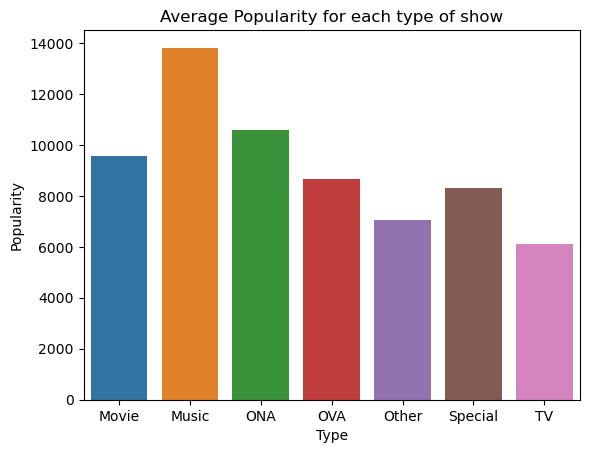

In [24]:
sns.barplot(data=avg,x='Type',y='Popularity').set(title='Average Popularity for each type of show')
plt.savefig('../images/justinf1.PNG')

### Figure 1
This graph above shows a barplot of the average popularity for each type of anime. Here, we can see that on average, TV is the most popular type of anime, as the lower the popularity score is, the better the rating. 

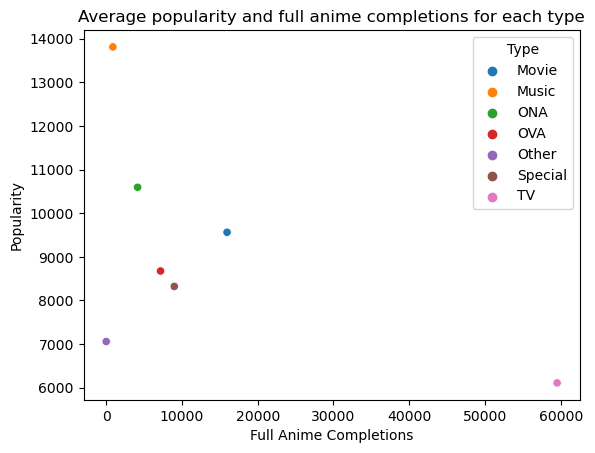

In [25]:
sns.scatterplot(data=df3,x='Full Anime Completions',y='Popularity',hue='Type').set(title='Average popularity and full anime completions for each type')
plt.savefig('../images/justinf2.PNG')

### Figure 2
This scatterplot above shows the relationship between average popularity and average full anime completions for each type of anime. We can see in this plot that TV has the most full completions and highest popularity score. If a line of best fit were to be drawn here, we could see that in general, as popularity decreases (higher rating), we see more full anime completions. This indicates that there is a positive correlation between popularity and full anime completions.

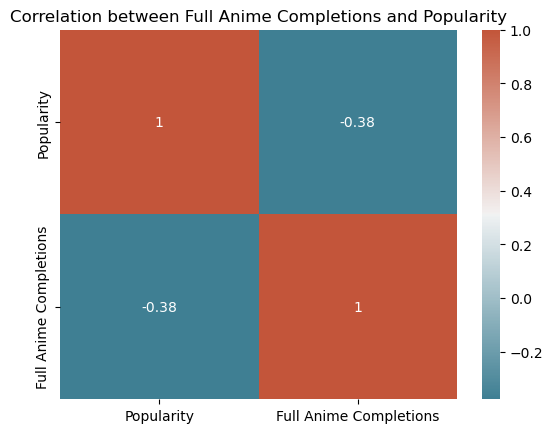

In [26]:
corr = df2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title='Correlation between Full Anime Completions and Popularity')
plt.savefig('../images/justinf3.PNG')

### Figure 3
This heatmap above shows the actual correlation between full anime completions and popularity. We can see that popularity has a correlation of -0.38 with full completions, indicating a positive correlation (The lower popularity rating, the better) between popularity and full anime completions.

## Is there a correlation between an animes popularity and its number of full completions?:
In figure 2, we can see that there is a slight positive correlation (remember, lower popularity is better), but not much of one between popularity and full anime completions. Figure 3 shows us that there is a very slight correlation (n=-0.38). It's important to note that although this correlation represents a negative number, it's actually a positive correlation, due to the fact that a lower popularity number indicates a higher popularity. 

## What is the most popular types of anime based on their popularity rating?
We can see that on average, TV type animes are the most popular (lower popularity number = more popularity), then other, special, and OVA. One important thing to note here is that the data range for 'Other' only has an average of 1.67 completions, which may cause a skew in the data since there are less completions to give a popularity rating, backed up by figure 4 where you see hardly any representation for the 'Other' category. TV has the highest representation by far, which could be an indicator that because TV shows are popular, more are being made in comparison to other types of anime. 

In [28]:
df2.to_csv('processed1.csv')